In [1]:
from os import chdir
chdir('..')

In [6]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import time
import numpy as np
from polylidar import extractPlanesAndPolygons
from shapely.geometry import LineString, Polygon, asPolygon
from shapely.ops import cascaded_union, unary_union
from shapely.affinity import scale
from scipy.spatial import Delaunay

from concave_evaluation.helpers import fake_building, plot_line, BLUE, GRAY, plot_arrow, scale_axes
%matplotlib notebook
sns.set()
sns.set_style("whitegrid")

In [3]:
def gen_polygons(n=100, scale = 10):
    points = np.random.randn(n,2)* scale
    tri = Delaunay(points)
    triangles = tri.points[tri.simplices]
    poly_triangles = []
    for i in range(triangles.shape[0]):
        points_ = triangles[i, :, :]
        poly  = asPolygon(points_)
        poly_triangles.append(poly)
    return poly_triangles, points

def union_timings(n_val=[1000, 2000, 4000, 8000, 16000, 32000]):
    records = []
    for n in n_val:
        poly_triangles, points = gen_polygons(n)
        t1 = time.time()
#         print(len(poly_triangles))
        cascaded_union(poly_triangles)
        elapsed = time.time() - t1
        records.append(dict(times=elapsed, n=n))
    return records

records = union_timings()


In [10]:
a, b = gen_polygons(n=50)
%timeit unary_union(a)

16.2 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<IPython.core.display.Javascript object>


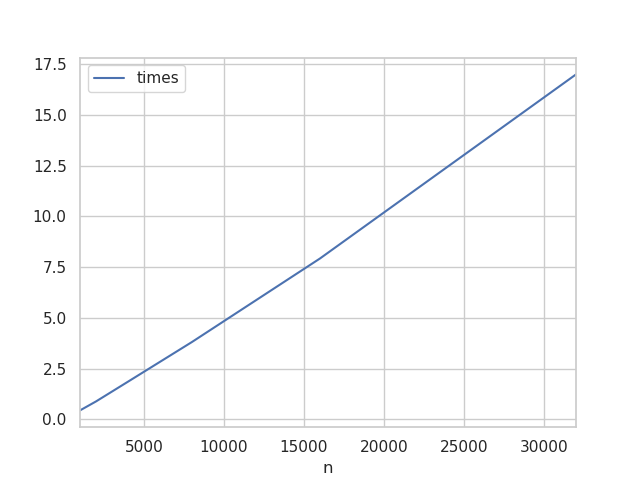

In [7]:
pd.DataFrame.from_records(records).plot(x='n', y='times')